In [1]:
#Implementation of Kmeans from scratch and using sklearn
#Loading the required modules 
import numpy as np
from scipy.spatial.distance import cdist 
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
 

[0.14890594 0.13618771]
(1797, 64)
(1797, 2)
101686.81607165349
For n_clusters = 10, silhouette score is 0.4063721563060642)


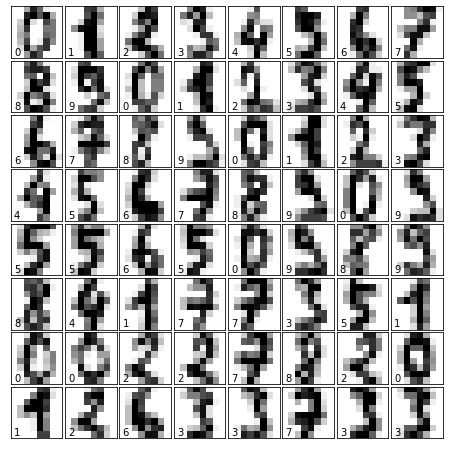

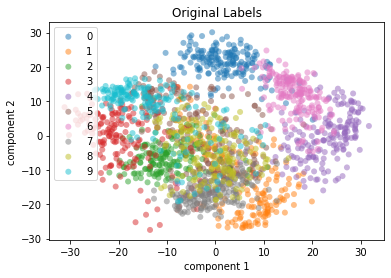

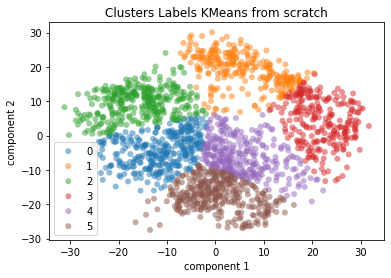

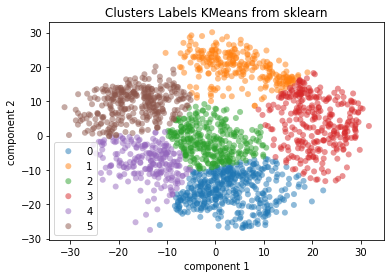

In [2]:

#Defining our kmeans function from scratch
def KMeans_scratch(x,k, no_of_iterations):
    idx = np.random.choice(len(x), k, replace=False)
    #Randomly choosing Centroids 
    centroids = x[idx, :] #Step 1
     
    #finding the distance between centroids and all the data points
    distances = cdist(x, centroids ,'euclidean') #Step 2
     
    #Centroid with the minimum Distance
    points = np.array([np.argmin(i) for i in distances]) #Step 3
     
    #Repeating the above steps for a defined number of iterations
    #Step 4
    for _ in range(no_of_iterations): 
        centroids = []
        for idx in range(k):
            #Updating Centroids by taking mean of Cluster it belongs to
            temp_cent = x[points==idx].mean(axis=0) 
            centroids.append(temp_cent)
 
        centroids = np.vstack(centroids) #Updated Centroids 
         
        distances = cdist(x, centroids ,'euclidean')
        points = np.array([np.argmin(i) for i in distances])
         
    return points


def show_digitsdataset(digits):
    fig = plt.figure(figsize=(6, 6))  # figure size in inches
    fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

    for i in range(64):
        ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
        ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')
        # label the image with the target value
        ax.text(0, 7, str(digits.target[i]))

    #fig.show()


def plot_samples(projected, labels, title):    
    fig = plt.figure()
    u_labels = np.unique(labels)
    for i in u_labels:
        plt.scatter(projected[labels == i , 0] , projected[labels == i , 1] , label = i,
                    edgecolor='none', alpha=0.5, cmap=plt.cm.get_cmap('tab10', 10))
    plt.xlabel('component 1')
    plt.ylabel('component 2')
    plt.legend()
    plt.title(title)

 
def main():
    #Load dataset Digits
    digits = load_digits()
    show_digitsdataset(digits)
    
    #Transform the data using PCA
    pca = PCA(2)
    projected = pca.fit_transform(digits.data)
    print(pca.explained_variance_ratio_)
    print(digits.data.shape)
    print(projected.shape)    
    plot_samples(projected, digits.target, 'Original Labels')
 
    #Applying our kmeans function from scratch
    labels = KMeans_scratch(projected,6,5)
    
    #Visualize the results 
    plot_samples(projected, labels, 'Clusters Labels KMeans from scratch')

    #Applying sklearn kemans function
    kmeans = KMeans(n_clusters=6).fit(projected)
    print(kmeans.inertia_)
    centers = kmeans.cluster_centers_
    score = silhouette_score(projected, kmeans.labels_)    
    print("For n_clusters = {}, silhouette score is {})".format(10, score))

    #Visualize the results sklearn
    plot_samples(projected, kmeans.labels_, 'Clusters Labels KMeans from sklearn')

    plt.show()
 
if __name__ == "__main__":
    main()